# UCI Online Retail II dataset - Exploratory Data Aanlysis & RFM Analysis

## Dataset Context
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

<br>

## Dataset Content
Attribute Information:

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

<br>

#### Reference
https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

In [112]:
# !pip install wordcloud

## Basic EDA

In [113]:
# import library
import pandas as pd
import numpy as np
import datetime

# Data Viusalization
import matplotlib.pyplot as plt
import seaborn as sns

# self-defined function for EDA
from eda_function import *

In [114]:
df = pd.read_csv("./data/online_retail_II.csv")

In [115]:
df.rename(columns={"Customer ID":"CustomerID"},inplace=True)

In [116]:
summary = df_summary(df)
summary

,dtype,num_missing,num_uniques
Invoice,object,0,53628
StockCode,object,0,5305
Description,object,4382,5698
Quantity,int64,0,1057
InvoiceDate,object,0,47635
Price,float64,0,2807
CustomerID,float64,243007,5942
Country,object,0,43


In [117]:
print("Unique values of each columns: ")
for col in df.columns:
  print(f"{col}: \n {df[col].unique()}\n")


Unique values of each columns: 
Invoice: 
 ['489434' '489435' '489436' ... '581585' '581586' '581587']

StockCode: 
 ['85048' '79323P' '79323W' ... '23609' '23617' '23843']

Description: 
 ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

Quantity: 
 [    12     48     24 ...    698  80995 -80995]

InvoiceDate: 
 ['2009-12-01 07:45:00' '2009-12-01 07:46:00' '2009-12-01 09:06:00' ...
 '2011-12-09 12:31:00' '2011-12-09 12:49:00' '2011-12-09 12:50:00']

Price: 
 [   6.95    6.75    2.1  ...  933.17 1714.17  224.69]

CustomerID: 
 [13085. 13078. 15362. ... 15520. 13298. 12713.]

Country: 
 ['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 '

Text(0.5, 0, 'quantity')

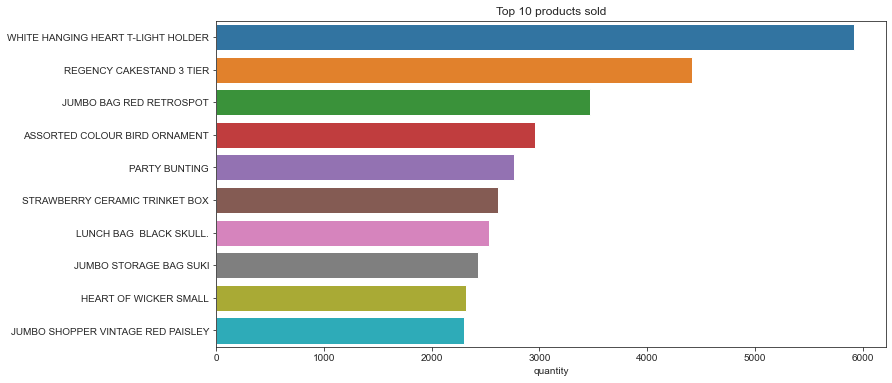

In [118]:
# selling trend
plt.figure(figsize=(12,6))
sns.barplot(x=df.Description.value_counts().head(10), y=df.Description.value_counts().head(10).index)
plt.title("Top 10 products sold")
plt.xlabel("quantity")

Text(0, 0.5, 'Items Purchased')

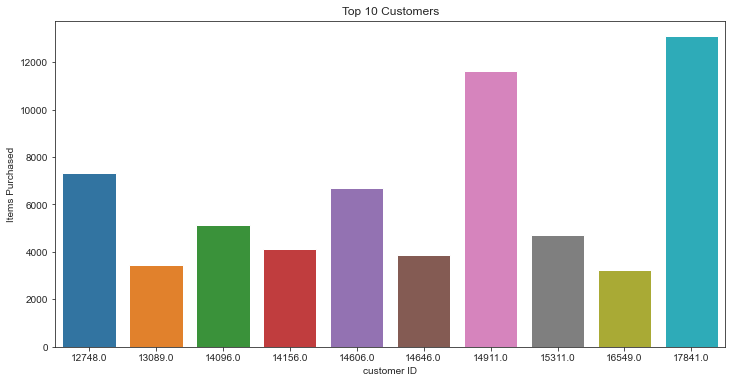

In [119]:
# top 10 spent a lot customer
# selling trend
plt.figure(figsize=(12,6))
sns.barplot(x=df.CustomerID.value_counts().head(10).index, y=df.CustomerID.value_counts().head(10))
plt.title("Top 10 Customers")
plt.xlabel("customer ID")
plt.ylabel("Items Purchased")

In [120]:
df['InvoiceDate'] = df['InvoiceDate'].astype(np.str).str.slice(0,10) 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df["InvoiceMonth"] = df.InvoiceDate.dt.month
df["InvoiceYear"] = df.InvoiceDate.dt.year
df["TotalPrice"] = df["Price"] * df["Quantity"]

Text(0.5, 0, 'Month')

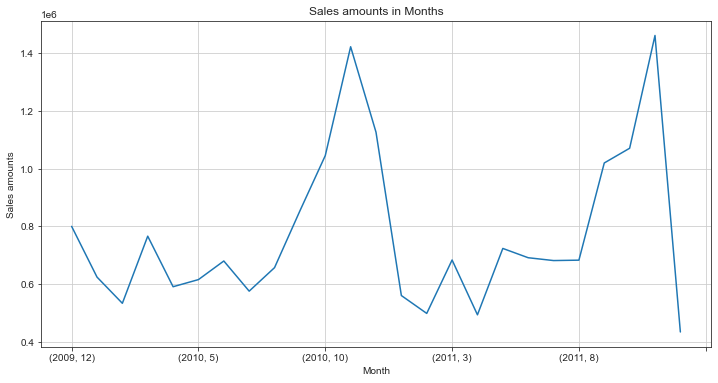

In [121]:
plt.figure(figsize=(12,6))
df.groupby(["InvoiceYear","InvoiceMonth"])["TotalPrice"].sum().plot(kind="line",label="sales",grid=True)
plt.title("Sales amounts in Months")
plt.ylabel("Sales amounts")
plt.xlabel("Month")

## Data Cleaning
**remove all N/A and duplicated data**


In [122]:
df_new = df.copy()
df_new.dropna(inplace=True)

In [123]:
df_new.duplicated().sum()

26481

In [124]:
df_new.drop_duplicates(inplace=True)
df_new.duplicated().sum()

0

Our dataset after removing na columns and duplicated data:

In [125]:
df_new.shape

(797883, 11)

In [126]:
summary_new = df_summary(df_new)
summary_new

,dtype,num_missing,num_uniques
Invoice,object,0,44876
StockCode,object,0,4646
Description,object,0,5299
Quantity,int64,0,643
InvoiceDate,datetime64[ns],0,604
Price,float64,0,1022
CustomerID,float64,0,5942
Country,object,0,41
InvoiceMonth,int64,0,12
InvoiceYear,int64,0,3


In [127]:
print("Unique values of each columns: ")
for col in df.columns:
  print(f"{col}: \n {df[col].unique()}\n")


Unique values of each columns: 
Invoice: 
 ['489434' '489435' '489436' ... '581585' '581586' '581587']

StockCode: 
 ['85048' '79323P' '79323W' ... '23609' '23617' '23843']

Description: 
 ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

Quantity: 
 [    12     48     24 ...    698  80995 -80995]

InvoiceDate: 
 ['2009-12-01T00:00:00.000000000' '2009-12-02T00:00:00.000000000'
 '2009-12-03T00:00:00.000000000' '2009-12-04T00:00:00.000000000'
 '2009-12-05T00:00:00.000000000' '2009-12-06T00:00:00.000000000'
 '2009-12-07T00:00:00.000000000' '2009-12-08T00:00:00.000000000'
 '2009-12-09T00:00:00.000000000' '2009-12-10T00:00:00.000000000'
 '2009-12-11T00:00:00.000000000' '2009-12-13T00:00:00.000000000'
 '2009-12-14T00:00:00.000000000' '2009-12-15T00:00:00.000000000'
 '2009-12-16T00:00:00.000000000' '2009-12-17T00:00:00.000000000'
 '2009-12-18T00:00:00.000000000' '2009-12-20T0

In [128]:
df_new.Country.value_counts().head(10)

United Kingdom    716113
Germany            17339
EIRE               16014
France             13897
Netherlands         5137
Spain               3754
Belgium             3110
Switzerland         3058
Portugal            2414
Australia           1890
Name: Country, dtype: int64

Different country may have different purchasing preference due to the cultures, ecnonomy, in order to avoid being affected by these factors, we have to focus on a single country here, and since most of the data here are from UK, our customer anaylsis will focus on the UK market first.

In [129]:
df_new[df_new.Quantity < 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,InvoiceMonth,InvoiceYear,TotalPrice
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01,2.95,16321.0,Australia,12,2009,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01,1.65,16321.0,Australia,12,2009,-9.9
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01,4.25,16321.0,Australia,12,2009,-17.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01,2.10,16321.0,Australia,12,2009,-12.6
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01,2.95,16321.0,Australia,12,2009,-35.4


The negative in quantity refers to cancellation, the Invoice code of these transition are all starts with the letter "c" which prove the cancellation.

In [130]:
df_new = df_new[(df_new.Quantity > 0) & (df_new.Price > 0)]

In [131]:
df_new = df_new[(df_new.Country == "United Kingdom")]

In [132]:
df_new

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,InvoiceMonth,InvoiceYear,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,12,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,12,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,12,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,12,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,12,2009,30.0
...,...,...,...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom,12,2011,23.4
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom,12,2011,23.6
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom,12,2011,30.0
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom,12,2011,214.8


In [133]:
df_new.InvoiceDate = pd.to_datetime(df_new.InvoiceDate, format = '%Y-%m-%d')
df_new.InvoiceDate = df_new.InvoiceDate.dt.date

In [134]:
df_new["TotalAmount"] = df_new.Price * df_new.Quantity

In [135]:
df_new

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,InvoiceMonth,InvoiceYear,TotalPrice,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,12,2009,83.4,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,12,2009,81.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,12,2009,81.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,12,2009,100.8,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,12,2009,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom,12,2011,23.4,23.4
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom,12,2011,23.6,23.6
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom,12,2011,30.0,30.0
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom,12,2011,214.8,214.8


In [136]:
df_new.describe()

,Quantity,Price,CustomerID,InvoiceMonth,InvoiceYear,TotalPrice,TotalAmount
count,700386.000000,700386.000000,700386.000000,700386.000000,700386.000000,700386.000000,700386.000000
mean,12.182429,3.065462,15550.403647,7.434001,2010.424933,20.544673,20.544673
std,143.110137,25.598521,1592.454624,3.427001,0.569810,237.749194,237.749194
min,1.000000,0.001000,12346.000000,1.000000,2009.000000,0.001000,0.001000
25%,2.000000,1.250000,14194.000000,5.000000,2010.000000,4.250000,4.250000
50%,4.000000,1.950000,15547.000000,8.000000,2010.000000,10.500000,10.500000
75%,12.000000,3.750000,16933.000000,11.000000,2011.000000,17.850000,17.850000
max,80995.000000,10953.500000,18287.000000,12.000000,2011.000000,168469.600000,168469.600000


## Recency, Frequency and Monetary Value calculation

In [137]:
# snapshot day
print(f"Data period: \nStart:\t{df_new.InvoiceDate.min()}\nEnd:\t{df_new.InvoiceDate.max()}")
snapshot_date = df_new.InvoiceDate.max() + datetime.timedelta(days = 1)
print(f"\nSnapshot date: {snapshot_date}")

Data period: 
Start:	2009-12-01
End:	2011-12-09

Snapshot date: 2011-12-10


In [138]:
df_new

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,InvoiceMonth,InvoiceYear,TotalPrice,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,12,2009,83.4,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,12,2009,81.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,12,2009,81.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,12,2009,100.8,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,12,2009,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom,12,2011,23.4,23.4
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom,12,2011,23.6,23.6
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom,12,2011,30.0,30.0
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom,12,2011,214.8,214.8


In [139]:
rfm_df = df_new.groupby("CustomerID").agg({'InvoiceDate': lambda x : (snapshot_date - x.max()).days,
                                           'Invoice':'count',
                                           'TotalAmount': 'sum'})

In [140]:
rfm_df.rename(columns={'InvoiceDate':'Recency', 'Invoice':'Frequency', 'TotalAmount':'MonetaryValue'},inplace = True)

# relation between RFM


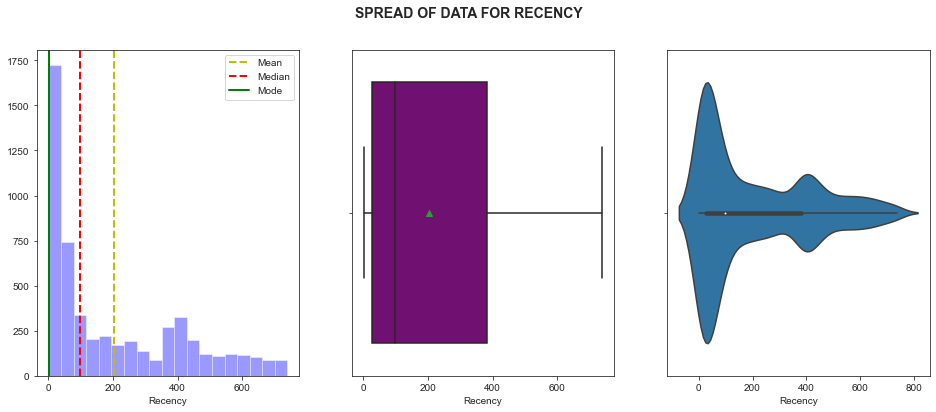

In [141]:
dist_box_violin(rfm_df.Recency)

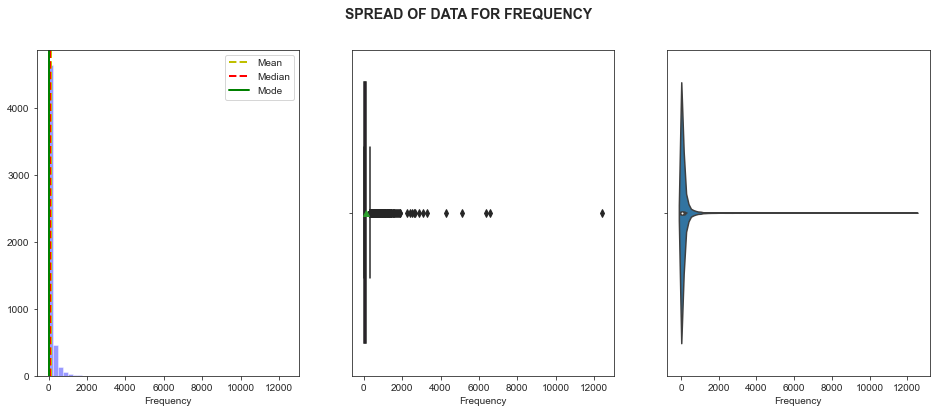

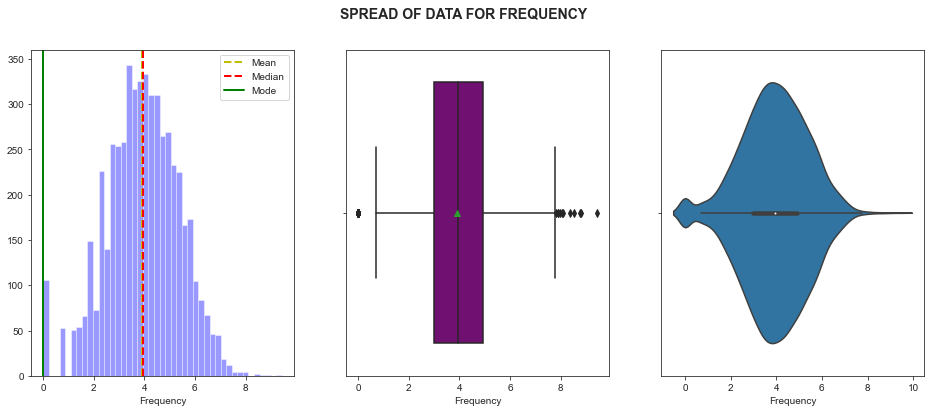

In [142]:
dist_box_violin(rfm_df.Frequency)
dist_box_violin(np.log(rfm_df.Frequency))

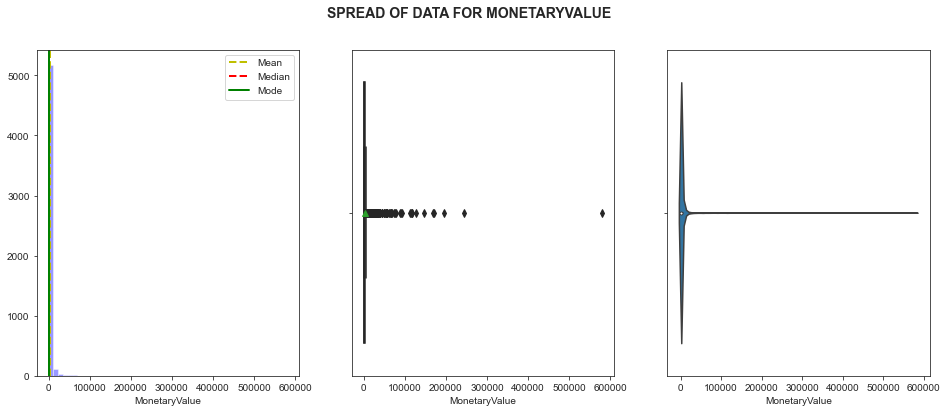

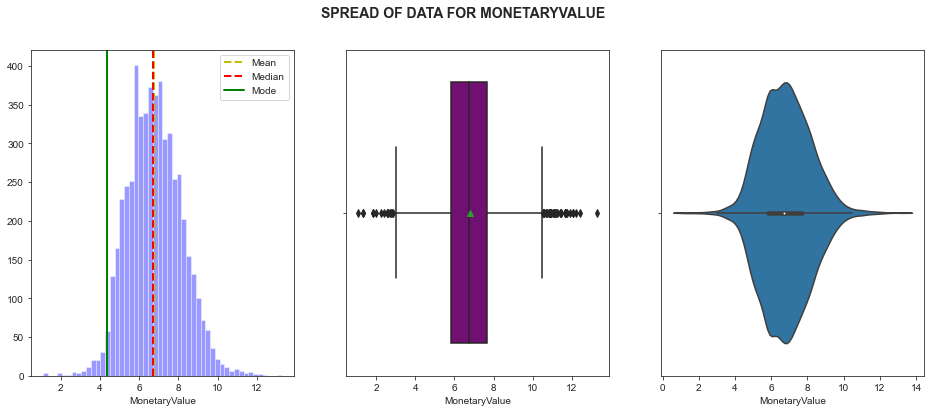

In [143]:
dist_box_violin(rfm_df.MonetaryValue)
dist_box_violin(np.log(rfm_df.MonetaryValue))

**Finding;**
- generally, the mean of last time customers purchased from the brand is around 100 days, while a lot of recently purchase records.

In [144]:
# relation between RFM

rfm_df.describe()

,Recency,Frequency,MonetaryValue
count,5350.000000,5350.000000,5350.000000
mean,203.546168,130.913271,2689.570340
std,209.973818,313.455279,11706.526134
min,1.000000,1.000000,2.950000
25%,26.000000,20.000000,330.202500
50%,99.000000,52.000000,829.440000
75%,382.000000,137.000000,2156.250000
max,739.000000,12435.000000,580987.040000


In [145]:
rfm_df

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,34,77556.46
12608.0,405,16,415.79
12745.0,487,22,723.85
12746.0,541,17,254.55
12747.0,3,249,8898.48
...,...,...,...
18283.0,4,938,2664.90
18284.0,432,28,461.68
18285.0,661,12,427.00


In [146]:
rfm_df["R"] = pd.qcut(rfm_df["Recency"], q = 4, labels = [4,3,2,1]) # smaller the better
rfm_df["F"] =  pd.qcut(rfm_df["Frequency"], q = 4, labels = [1,2,3,4]) # larger the better
rfm_df["M"] = pd.qcut(rfm_df["MonetaryValue"], q = 4, labels = [1,2,3,4]) # larger the better

rfm_df["RFMSegment"] = rfm_df["R"].astype("string") + rfm_df["F"].astype("string") + rfm_df["M"].astype("string")
rfm_df["RFMScore"] = rfm_df["R"].astype("int") + rfm_df["F"].astype("int") + rfm_df["M"].astype("int") 

In [147]:
rfm_df

,Recency,Frequency,MonetaryValue,R,F,M,RFMSegment,RFMScore
CustomerID,,,,,,,,
12346.0,326,34,77556.46,2,2,4,224,8
12608.0,405,16,415.79,1,1,2,112,4
12745.0,487,22,723.85,1,2,2,122,5
12746.0,541,17,254.55,1,1,1,111,3
12747.0,3,249,8898.48,4,4,4,444,12
...,...,...,...,...,...,...,...,...
18283.0,4,938,2664.90,4,4,4,444,12
18284.0,432,28,461.68,1,2,2,122,5
18285.0,661,12,427.00,1,1,2,112,4


## Analyzing RFM Segments

1. Segment the RFM_score and get the final group, 
2. Add the RFM label to the new_df dataframe, 
3. Call out what is the common product (Description) bought by each group.

In [148]:
rfm_df.groupby("RFMScore").agg({"Recency":"mean", "Frequency":"mean", "MonetaryValue":["mean","count"]}).round(2)

Recency Frequency MonetaryValue      
            mean      mean          mean count
RFMScore                                      
3         547.29      9.37        168.59   498
4         385.98     17.18        240.75   513
5         318.03     23.80        407.53   574
6         236.85     34.55        652.16   566
7         188.96     49.31       1091.10   569
8         152.53     74.24       1376.97   563
9          97.82    109.92       2204.62   509
10         68.53    172.00       3125.23   506
11         36.92    277.21       4774.65   488
12         10.53    541.81      12675.66   564

**Customers Segments:**
- 3 - 5
- 6 - 8
- 9 - 12

In [149]:
customergroup_df = rfm_df.drop(columns=["Recency","Frequency","MonetaryValue"])
customergroup_df["CustomerGroup"] = np.where((customergroup_df["RFMScore"] < 6), "Gold",
                                     np.where((customergroup_df["RFMScore"] > 8), "Bronze","Sliver"))

In [150]:
customergroup_df

,R,F,M,RFMSegment,RFMScore,CustomerGroup
CustomerID,,,,,,
12346.0,2,2,4,224,8,Sliver
12608.0,1,1,2,112,4,Gold
12745.0,1,2,2,122,5,Gold
12746.0,1,1,1,111,3,Gold
12747.0,4,4,4,444,12,Bronze
...,...,...,...,...,...,...
18283.0,4,4,4,444,12,Bronze
18284.0,1,2,2,122,5,Gold
18285.0,1,1,2,112,4,Gold


In [151]:
#customergroup_df.to_csv("customergroup_brief.csv",index=False)

In [152]:
customergroup_df.RFMScore.value_counts()

5     574
7     569
6     566
12    564
8     563
4     513
9     509
10    506
3     498
11    488
Name: RFMScore, dtype: int64

In [153]:
customergroup_df.CustomerGroup.value_counts()

Bronze    2067
Sliver    1698
Gold      1585
Name: CustomerGroup, dtype: int64

## Customers segmentation with RFMSegment

In [154]:
final_df = df_new.merge(rfm_df, on="CustomerID")

final_df["CustomerGroup"] = np.where((final_df["RFMScore"] > 9), "Gold",
                                     np.where((final_df["RFMScore"] < 7), "Bronze","Sliver"))

In [155]:
final_df["RFMSegment"].value_counts()

444    305583
344    100659
244     37116
443     25792
343     21878
333     18171
233     17820
433     14338
243     14081
334      9641
434      8829
133      8292
232      7473
222      7396
122      7305
144      6741
143      6428
432      6397
332      5926
322      5401
132      5367
234      5299
121      4953
111      4664
422      3501
223      3338
442      3331
323      3293
211      2469
342      2452
221      2382
242      2271
123      2002
423      1975
321      1526
231      1504
311      1399
131      1393
112      1389
134      1311
212       995
421       900
324       800
331       764
411       740
424       727
312       691
431       649
412       643
142       501
224       388
124       337
313       282
213       254
113       187
413       129
214       124
314        79
114        76
414        34
Name: RFMSegment, dtype: Int64

#### RFM Customers segmentation for different marketing strategies:

In [156]:
best_customer = ["111"]
high_spending_new = ["141","142"]
lowest_spending_loyal = ["113","114"]
churned_best = ["411","412","421","422"]

id_list = [best_customer,high_spending_new,lowest_spending_loyal,churned_best]

In [157]:
# sub-function
def rfm_customer(label):
    array = final_df[final_df["RFMSegment"] == label].CustomerID.unique()
    outcome_list = array.tolist()
    outcome_list = sorted([int(y) for y in outcome_list])
    
    return outcome_list 

# # main-function
# def rfm_id(group):
#       outcome_list = []
#       for x in high_spending_new:
#             id = rfm_customer(x)

#             for y in id:
#                   outcome_list.append(y)

#       return outcome_list

In [158]:
# a for loop print out all the customer group 
for group in id_list:
      print(f"These are the Customer ID for {group}:")
      for label in group:
            print(f"RFM Segment = *{label}*")
            print(rfm_customer(label))
            print()
      print("-"*200,"\n")

These are the Customer ID for ['111']:
RFM Segment = *111*
[12746, 12846, 12848, 12850, 12860, 12861, 12887, 12892, 12914, 12927, 12934, 12946, 12954, 12959, 12969, 12992, 13007, 13009, 13025, 13036, 13051, 13053, 13056, 13063, 13071, 13076, 13084, 13087, 13088, 13105, 13111, 13112, 13114, 13119, 13125, 13128, 13129, 13163, 13172, 13180, 13215, 13219, 13222, 13250, 13257, 13289, 13290, 13303, 13306, 13312, 13326, 13331, 13346, 13380, 13383, 13392, 13399, 13423, 13438, 13445, 13457, 13469, 13490, 13498, 13511, 13535, 13556, 13578, 13580, 13582, 13586, 13609, 13620, 13628, 13653, 13661, 13674, 13676, 13683, 13701, 13702, 13746, 13757, 13766, 13773, 13788, 13789, 13793, 13794, 13818, 13829, 13830, 13834, 13839, 13847, 13852, 13903, 13905, 13906, 13907, 13912, 13913, 13915, 13942, 13943, 13968, 14003, 14007, 14017, 14033, 14074, 14084, 14086, 14095, 14106, 14144, 14153, 14187, 14190, 14192, 14207, 14263, 14266, 14269, 14274, 14278, 14279, 14281, 14318, 14325, 14330, 14347, 14361, 14363, 14

## Customer Anaylsis - Products Keywords

**Keyword of products in different segments**

In [159]:
final_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,InvoiceMonth,InvoiceYear,...,TotalAmount,Recency,Frequency,MonetaryValue,R,F,M,RFMSegment,RFMScore,CustomerGroup
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,12,2009,...,83.4,158,84,2433.28,2,3,4,234,9,Sliver
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,12,2009,...,81.0,158,84,2433.28,2,3,4,234,9,Sliver
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,12,2009,...,81.0,158,84,2433.28,2,3,4,234,9,Sliver
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,12,2009,...,100.8,158,84,2433.28,2,3,4,234,9,Sliver
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,12,2009,...,30.0,158,84,2433.28,2,3,4,234,9,Sliver


In [160]:
# final_df.to_csv("customergroup_details.csv",index=False)

In [161]:
from wordcloud import WordCloud

In [162]:
def group_word_cloud(labels):
  """input group labels and return the keyword of products that group purchased
  """
  print(f"These are the keywords of the products purchased by *Group {labels}*:")
  # getting a list of the descriptions in terms of words
  text = final_df[final_df["CustomerGroup"] == labels].Description
  re_text = " ".join(text.astype("string"))
  
  # wordcloud part
  wordcloud = WordCloud(font_path="Lato-Bold.ttf", width=800, height=400, background_color="white").generate(re_text)
  
  # Display the images
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()  

  # wordcloud.to_file((f"{labels}.png"))

In [163]:
# group_word_cloud("Gold")

In [164]:
# group_word_cloud("Sliver")

In [165]:
# group_word_cloud("Bronze")